In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from gensim.models import Word2Vec, KeyedVectors
from sklearn.manifold import TSNE
from scipy.spatial import distance

In [2]:
model = Word2Vec.load("training/models/pretrained_embeddings")

In [3]:
ELEMENTS = ["H", "He", "Li", "Be", "B", "C", "N", "O", "F", "Ne", "Na", "Mg", "Al", "Si", "P", "S", "Cl", "Ar", "K",
            "Ca", "Sc", "Ti", "V", "Cr", "Mn", "Fe", "Co", "Ni", "Cu", "Zn", "Ga", "Ge", "As", "Se", "Br", "Kr",
            "Rb", "Sr", "Y", "Zr", "Nb", "Mo", "Tc", "Ru", "Rh", "Pd", "Ag", "Cd", "In", "Sn", "Sb", "Te", "I",
            "Xe", "Cs", "Ba", "La", "Ce", "Pr", "Nd", "Pm", "Sm", "Eu", "Gd", "Tb", "Dy", "Ho", "Er", "Tm", "Yb",
            "Lu", "Hf", "Ta", "W", "Re", "Os", "Ir", "Pt", "Au", "Hg", "Tl", "Pb", "Bi", "Po", "At", "Rn", "Fr",
            "Ra", "Ac", "Th", "Pa", "U", "Np", "Pu", "Am", "Cm", "Bk", "Cf", "Es", "Fm", "Md", "No", "Lr", "Rf",
            "Db", "Sg", "Bh", "Hs", "Mt", "Ds", "Rg", "Cn", "Nh", "Fl", "Mc", "Lv", "Ts", "Og"]

In [4]:
def is_formula(formula: str) -> bool:
    """Simple function returning boolean on whether a string represents a simple chemical formula.
        Misses several edge cases (BCS, Tc, organic superconductors)"""
        N = len(formula)
        i = 0
        while i < N:
            if formula[i].isupper():
                if i < N - 1 and formula[i+1].islower and str(formula[i]+formula[i+1]) in ELEMENTS:
                    if i < N-2 and formula[i+2].isdigit():
                        if i < N-3 and formula[i+3].isdigit():
                            i += 4
                        else:
                            i += 3
                    else:
                        i += 2
                elif formula[i] in ELEMENTS:
                    if i < N - 1 and formula[i+1].isdigit():
                        if i < N-2 and formula[i+2].isdigit():
                            i += 3
                        else:
                            i += 2
                    else:
                        
                        i += 1
                else:
                    return False
            else:
                return False  
            
        return True
    
    
def atom_list(formula):
    "returns list of atoms contained in a chemical formula, allowing for removal of duplicate compounds"
        N = len(formula)
        atoms = []
        i = 0
        for i in range(N):
            if formula[i].isupper():
                if i < N - 1 and formula[i+1].islower and str(formula[i]+formula[i+1]) in ELEMENTS:
                    atoms.append(str(formula[i]+formula[i+1]))
                elif formula[i] in ELEMENTS:
                    atoms.append(formula[i])
                
        return atoms 

In [5]:
"List of most commonly appearing elements/compounds in the corpus"
w2c = dict()
for item in model.wv.vocab:
    if is_formula(item):
        w2c[item]=model.wv.vocab[item].count
w2cSorted=dict(sorted(w2c.items(), key=lambda x: x[1],reverse=True))
w2cSortedList = list(w2cSorted.keys())

In [6]:
"generating high-Tc similarity vector for each word in w2c"
embeddings = []
words = []
high_tc_similarity = []
for word in w2cSortedList[1:10000]:
    words.append(word)
    embeddings.append(model.wv[word])
    high_tc_similarity.append(model.wv.similarity(word, 'high-Tc_superconductor'))

In [7]:
viridis = cm.get_cmap('viridis', 12)
greys = cm.get_cmap('Greys', 12)

In [8]:
"In two dimensions"
embeddings = np.array(embeddings)
tsne_model_in_2d = TSNE(perplexity=20, n_components=2, init = 'pca', n_iter=3500, random_state = 3)
embeddings_in_2d = np.array(tsne_model_in_2d.fit_transform(embeddings))

In [9]:

candidates = model.wv.most_similar(positive = ["high-Tc_superconductor", "high-T_c_superconductor",
                                             "high-Tc_superconductors", "high-T_c_superconductors"], 
                                  topn = 20000)

In [10]:
"filtering out (most) non-elements and duplicate elements"
filtered_candidates = []
atom_lists = []
for word, _ in candidates:
    if is_formula(word):
        atoms = atom_list(word)
        if atoms not in atom_lists:
            filtered_candidates.append(word)
            atom_lists.append(atoms)

In [11]:
def sc_group_distance(index):
    return distance.euclidean(embeddings_in_2d[index], embeddings_in_2d[words.index('BSCCO')])

In [12]:
distance_reference = sc_group_distance(words.index('YBCO'))

In [19]:
"Candidate words distant from the high-Tc cluster"
unlikely_matches = []
for i in range(len(words)):
    if words[i] in filtered_candidates and sc_group_distance(i) > 5*distance_reference:
        unlikely_matches.append(words[i])

unlikely_matches

['Tl',
 'F4K2Ni',
 'NbSe2',
 'GaNdO3',
 'B6Sm',
 'SiV3',
 'CeCu6',
 'C20K',
 'Os4PrSb12',
 'C20Rb',
 'BaHfO3',
 'BiO3',
 'CeRu2',
 'CMgNi3',
 'Rh2Si2Yb',
 'B2Cu2O6Sr',
 'TeTm',
 'SeTm',
 'CuF3K',
 'Fe4P12Pr',
 'IrO4Sr2',
 'AsCeRh',
 'C2CuN2S2',
 'Mn2O6PrSr',
 'OsPr',
 'P12PrRu4',
 'BaO3Pr',
 'CeCu2Ge2',
 'Mn2O7',
 'Ba2FeMoO6',
 'CePdSn',
 'AlO6Sr2Ta',
 'BaNiO5Y2',
 'Cu2EuSi2',
 'Cl3CuK',
 'BSCO',
 'La3S4',
 'Cu5U',
 'Al4CeNi',
 'FeMoO6',
 'SINIS',
 'BiCuOS',
 'CeRu4Sb12',
 'O6Pb2ScTa',
 'BaO3Tb',
 'CrO6ReSr2',
 'CoF4K2',
 'MnO4V2',
 'IrU',
 'Mn2O7Tl2',
 'GeNiU',
 'Ca3O7Ru2',
 'C3Y2',
 'AsSeTh',
 'Ce2In8Rh',
 'Cl4CrRb2',
 'CsI3Mn',
 'Ru2SnU2',
 'Cl4Cs2Cu',
 'B4Fe3NdO12',
 'O6SbSr2Y',
 'AgGeYb',
 'Cu2Si2Yb',
 'BiPtYb',
 'P12Ru4Sm',
 'GeV3',
 'B2CNi2Yb',
 'C20Cs',
 'Ru2Si2Tb',
 'BaNd2NiO5',
 'C8HgK',
 'FeO6ReSr2',
 'Ir2Si2Yb',
 'F4FeK2',
 'F4LiTb',
 'CePdSb',
 'Ca17Mn20O60Sm3',
 'AcMn12',
 'AgLa',
 'GdO6RuSr2',
 'FeLiP',
 'FePr',
 'Fe3Sc2Si5',
 'DyGe6Mn6',
 'AgB2',
 'EuFe2P2',
 'AlGeMn',


//anaconda3/envs/mat2vec/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


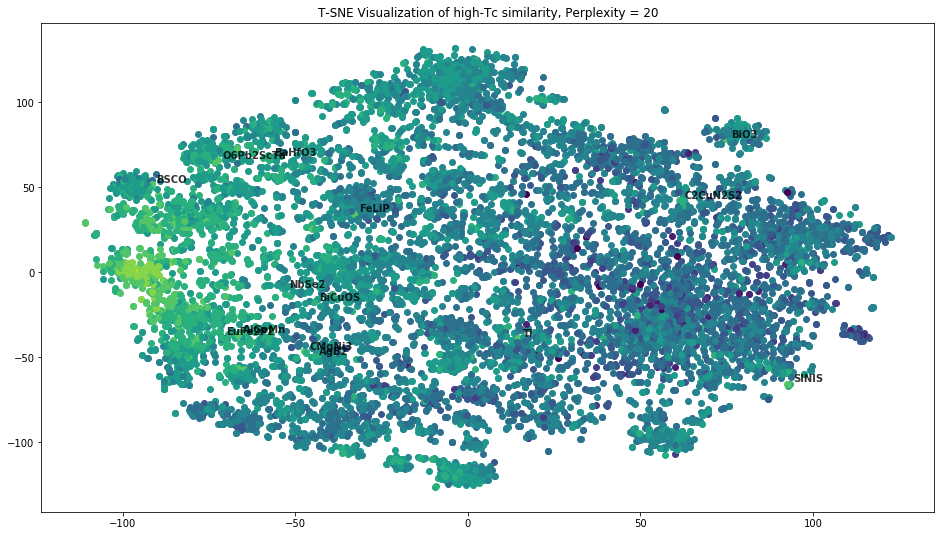

In [16]:
"""Visualization of some of the commonly mentioned furthest elements away from the high-Tc cluster"""
plt.figure(figsize = (16,9))
for i in range(len(embeddings_in_2d)):
    x = embeddings_in_2d[i][0]
    y = embeddings_in_2d[i][1]
    plt.scatter(x, y, color = viridis(np.sqrt(high_tc_similarity[i])))
    if words[i] in filtered_candidates and sc_group_distance(i) > 10*distance_reference:
        plt.annotate(words[i], alpha=0.8, xy = (x,y), xytext = (5,2), weight = 'bold', textcoords="offset points")
plt.title("T-SNE Visualization of high-Tc similarity, Perplexity = 20")
plt.show()

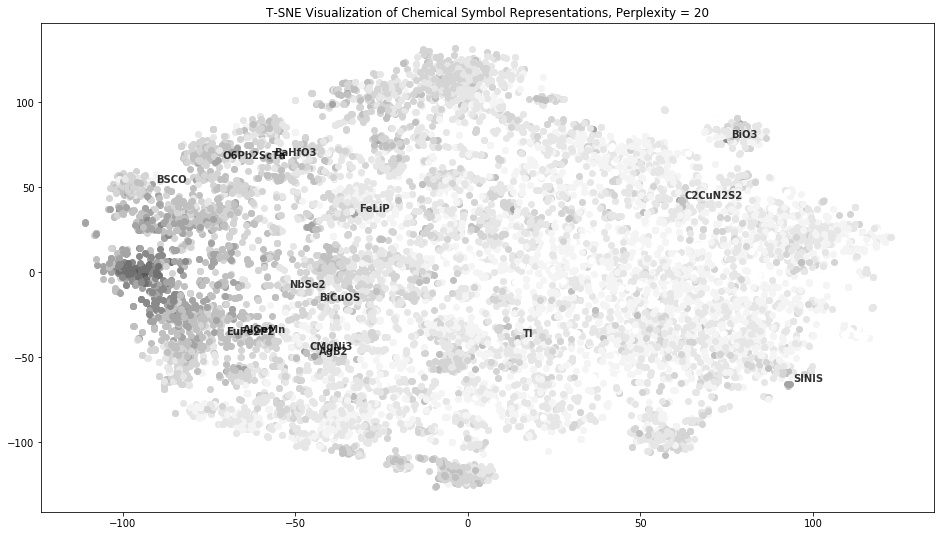

In [17]:
plt.figure(figsize = (16,9))
for i in range(len(embeddings_in_2d)):
    x = embeddings_in_2d[i][0]
    y = embeddings_in_2d[i][1]
    plt.scatter(x, y, color = greys(high_tc_similarity[i]) )
    if words[i] in filtered_candidates and sc_group_distance(i) > 10*distance_reference:
        plt.annotate(words[i], alpha=0.8, xy = (x,y), xytext = (5,2), weight = 'bold', textcoords="offset points")
plt.title("T-SNE Visualization of Chemical Symbol Representations, Perplexity = 20")
plt.show()